In [66]:
#INIT PROCEDURE

INFO:DT:Loaded homography for arki


(480, 640, 3)
[[    0.          1821.20666504  2088.89746094  3540.8125    ]
 [    0.          1275.47961426  1268.99560547    36.19226074]]
WARP PERSPECTIVE TOOK: seconds
0.00173592567444


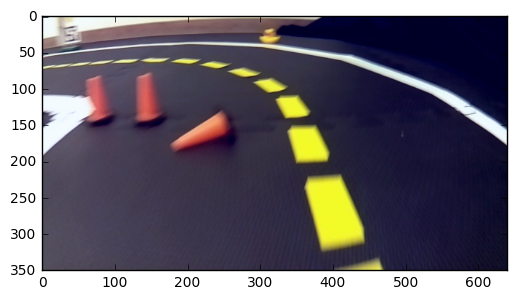

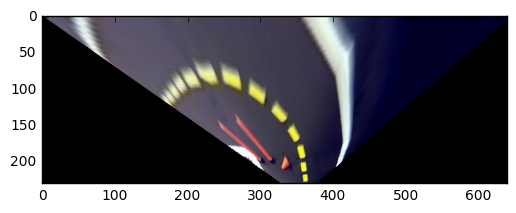

In [298]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time
from skimage import measure
from duckietown_utils import load_map, load_camera_intrinsics, load_homography, rectify
from numpy.linalg import inv
#doing obstacle detection exploiting the color and an inverse homography such that all objects keep their basic size!
#improvements: more restrictive yellow filter
#decision if duckie or not done by size only since the ducks are not a flat object on the plane that is why they are
#significantly larger!!!
#the transformation has to be validated under other homographies



H = load_homography('arki')
#print H
#print np.dot(H, [600,600,1])
filename = '/home/niggi/savior_bags/21.12./Record6/8_pics/1098.jpg'
im1 = cv2.imread(filename) #reads BGR
print np.shape(im1)
im1_cropped = im1[130:,:,:]
im1_orig=np.copy(im1_cropped)
#plt.imshow(im1_cropped); plt.show()


#STUFF FOR TRANSFORMING THE IMAGE
x0=0
x1=640
y0=50
y1=350
pts1 = np.float32([[x0,y0],[x0,y1],[x1,y1],[x1,y0]])
pts1_h = np.float32([[x0,y0+130,1],[x0,y1+130,1],[x1,y1+130,1],[x1,y0+130,1]])
#add the crop offset to being able to calc real world coordinates correctly!!!
pts2_h = np.dot(H,np.transpose(pts1_h))

pts2 = np.float32((pts2_h[0:2,:]/pts2_h[2,:]*1000))
maximum_height = np.max([pts2[0,:]])
maximum_left = np.max([pts2[1,:]])
#print pts2
#determine points number 2!!!


pts2 = np.flipud(np.float32((np.float32([[maximum_height],[maximum_left]])-pts2)))
print pts2
max_x = int(np.max(pts2[0]))
factor_x = 640.0/max_x
max_y = int(np.max(pts2[1]))
factor_y = 300.0/max_y
pts2 = pts2*np.float32([[factor_x],[factor_x]])
#flipud only cause world frame is flipped,..

M = cv2.getPerspectiveTransform(pts1,np.transpose(pts2))
inv_M = inv(M)

start = time.time()
im_test = cv2.warpPerspective(im1_cropped,M,(int(np.max(pts2[0])),int(np.max(pts2[1])))) #for dori
end = time.time()
print "WARP PERSPECTIVE TOOK: seconds"
print(end - start)
#im_test = cv2.warpPerspective(im1_cropped,M,(3000,1280)) # for arki
plt.imshow(im1_cropped[:,:,::-1]); plt.show()
plt.imshow(im_test[:,:,::-1]); plt.show()
#This is the birds perspective view!




In [291]:
# Convert BGR to HSV FOR BEING ABLE TO APPLY FILTERS NOW!!!
hsv = cv2.cvtColor(im_test, cv2.COLOR_BGR2HSV)

White filtered img
0.0003502368927


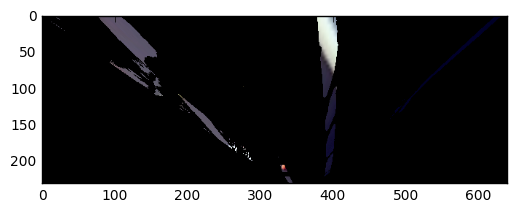

Orange filtered img
0.00034499168396
0.000251054763794


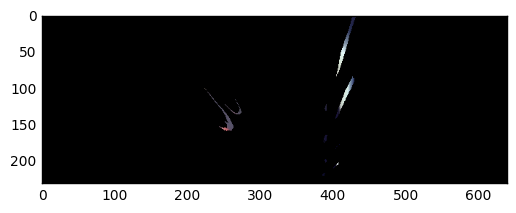

Yellow filtered img


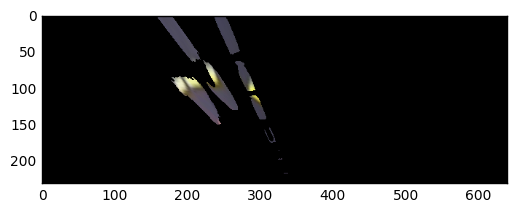

In [299]:
#NEW PAR7
#COLOR THRESHOLDS
lower_white = np.array([0,0,150])
upper_white = np.array([255,25,255])


lower_orange1 = np.array([5,100,150])
upper_orange1 = np.array([15,255,255])

lower_orange1 = np.array([0,100,100])
upper_orange1 = np.array([15,255,255])

lower_orange2 = np.array([170,100,100])
upper_orange2 = np.array([180,255,255])

lower_orange2 = np.array([170,100,100])
upper_orange2 = np.array([170,100,100])


lower_yellow = np.array([20,100,150]) 
upper_yellow = np.array([35, 255, 255])

# Threshold the HSV image to get the specific colors
print "White filtered img"
start = time.time()
mask_trala = cv2.inRange(hsv, lower_white, upper_white)
end = time.time()
print end-start
res = cv2.bitwise_and(im_test,im_test, mask= mask_trala)
plt.imshow(res[:,:,::-1]); plt.show()
#plt.imshow(mask_trala, cmap='gray'); plt.show()

print "Orange filtered img"
start = time.time()
mask_trala1 = cv2.inRange(hsv, lower_orange1, upper_orange1)
end = time.time()
print end-start

start = time.time()
mask_trala2 = cv2.inRange(hsv, lower_orange2, upper_orange2)
end = time.time()
print end-start

res = cv2.bitwise_and(im_test,im_test, mask= (mask_trala1+mask_trala2))
plt.imshow(res[:,:,::-1]); plt.show()
#plt.imshow(mask_trala1+mask_trala2, cmap='gray'); plt.show()

print "Yellow filtered img"
start = time.time()
mask_trala3 = cv2.inRange(hsv, lower_yellow, upper_yellow)
end = time.time()
res = cv2.bitwise_and(im_test,im_test, mask= mask_trala3)
plt.imshow(res[:,:,::-1]); plt.show()
#plt.imshow(mask_trala3, cmap='gray'); plt.show()


VERUNDGUNG BEIDE BILDER TOOK:
0.000207901000977
COMBINED PICTURE


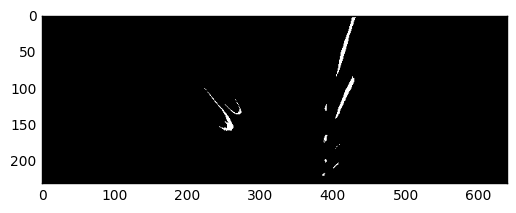

SEGMENTING IMAGE TOOK: seconds
0.000924825668335
REGIONPROPS TOOK: seconds
0.000709056854248


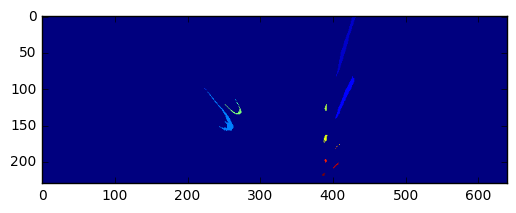

640.147
REDING IMG TOOK:
0.000169038772583


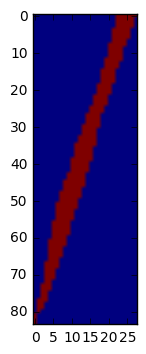

38
12
38
12
WIDTH
4
HEIGHT
16
255
(531.71891854841351, 1.7269215626751588)
307.899866468
False
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!NEW OBJECT!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
PERIMETER IS:
182.225396744
MAJOR AXIS
92.2361246843
0.987820105019
!!!!!!!!!!!!!!!!!BEHIND A LINE!!!!!!!!!!!!!!!!!!111
REDING IMG TOOK:
8.89301300049e-05


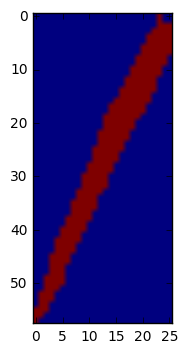

25
13
25
13
WIDTH
5
HEIGHT
13
255
(264.97825482205712, 2.0145965824714551)
131.529189083
False
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!NEW OBJECT!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
PERIMETER IS:
132.26093065
MAJOR AXIS
65.1126107383
1.01563221894
!!!!!!!!!!!!!!!!!BEHIND A LINE!!!!!!!!!!!!!!!!!!111
REDING IMG TOOK:
0.000125169754028


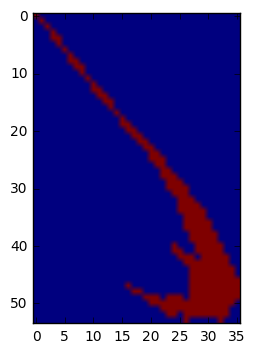

37
25
37
25
WIDTH
4
HEIGHT
22
255
(218.21740432197836, 14.440456241287478)
15.1115311508
False
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!NEW OBJECT!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
PERIMETER IS:
133.604076401
MAJOR AXIS
59.0887338598
1.13053764799
!!!!!!!!!!!!!!!!!BEHIND A LINE!!!!!!!!!!!!!!!!!!111
REDING IMG TOOK:
7.79628753662e-05


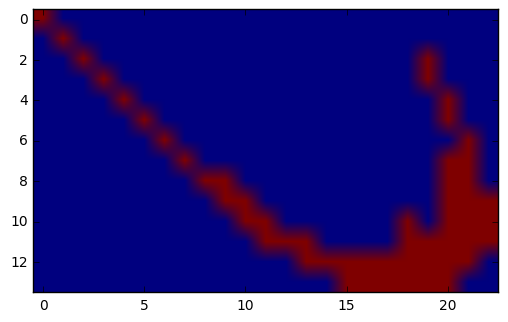

8
15
8
15
WIDTH
13
HEIGHT
1
255
(42.841544588691974, 8.3880744928316915)
5.10743492148
False
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!NEW OBJECT!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
PERIMETER IS:
47.591883092
MAJOR AXIS
26.1813810449
0.908887942359
!!!!!!!!!!!!!!!!!BEHIND A LINE!!!!!!!!!!!!!!!!!!111
ITERATING THROUGH TOOK: s
0.184415817261


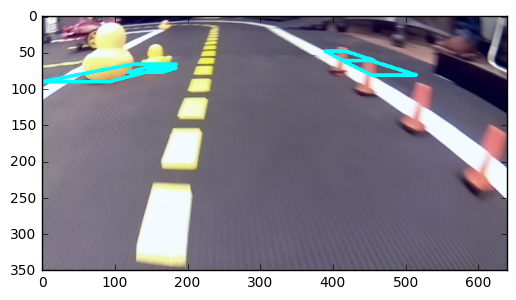

In [297]:
#NORMAL ALGORITHM STARTS

#plt.imshow(mask_trala1+mask_trala2+mask_trala3, cmap='gray'); plt.show()
im1_cropped = im1[130:,:,:] #do this to being able to tune only staying in here
start = time.time()
#mask = np.bitwise_or((mask_trala3/2),mask_trala1+mask_trala2)
mask = mask_trala1+mask_trala2
end = time.time()
print "VERUNDGUNG BEIDE BILDER TOOK:"
print (end-start)
print "COMBINED PICTURE"
plt.imshow(mask,cmap='gray');plt.show()
#show "yellow-filtered image

#--------------------SEGMENT AND EVALUATE-----------------------------------------------------------------

#ÜBERPRÜFUNG OB NACH GELBFILTER WAS ÜBRIGGEBLIEBEN IST:
if(np.sum(mask)!=0):
    
    start = time.time()
    final=measure.label(mask)
    end = time.time()
    print "SEGMENTING IMAGE TOOK: seconds"
    print(end - start)
    
    #NOT WORKING NOW
    #start = time.time()
    #print np.shape(final)
    #abc=measure.perimeter(erf,neighbourhood=8)
    #end = time.time()
    #print "PERIMETER TOOK: seconds"
    #print(end - start)
    
    
    start = time.time()
    props=measure.regionprops(final,mask)
    end = time.time()
    print "REGIONPROPS TOOK: seconds"
    print(end - start)
    plt.imshow(final); plt.show()
    
    i=np.max(final)
    
    #-----------------------FILTER MUSS TIEFENABHÄNGIG WERDEN!!!-------------------------------------------
    print np.max(pts2[0])
    start = time.time()
    for k in range(1,i+1): #durch alle zahlen durchiterieren
        #first only keep large elements then eval their shape        
        if (props[k-1]['area']>50):
            
            start = time.time()
            abc = np.array(props[k-1]['intensity_image'])
            abc1 = np.array(np.array(props[k-1]['intensity_image'])[int(props[k-1]['weighted_local_centroid'][0]),:])
            abc2 = np.array(np.array(props[k-1]['intensity_image'])[:,int(props[k-1]['weighted_local_centroid'][1])])
            end = time.time()
            print "REDING IMG TOOK:"
            print end-start
            #print abc[:,1]
            #print np.shape(abc)
            plt.imshow(abc);plt.show()
            print int(props[k-1]['local_centroid'][0])
            print int(props[k-1]['local_centroid'][1])
            
            print int(props[k-1]['weighted_local_centroid'][0])
            print int(props[k-1]['weighted_local_centroid'][1])
            
            #abc1 = np.array(abc[int(props[k-1]['local_centroid'][0]),:])
            #print np.shape(abc1)
            #print np.shape(abc1)
            #print abc1
            #abc2 = np.array(abc[:,int(props[k-1]['local_centroid'][1])])
            #print np.shape(abc2)
            #print abc2
            
            first_max = np.argmax(abc1)
            last_max = np.argmax(np.flipud(abc1))
            width = np.shape(abc1)[0]-(1+last_max)-first_max
            print "WIDTH"
            print width
            
            first_max = np.argmax(abc2)
            last_max = np.argmax(np.flipud(abc2))
            height = np.shape(abc2)[0]-(1+last_max)-first_max
            print "HEIGHT"
            print height
            
            
                        
            
            color_info = props[k-1]['max_intensity']
            print color_info
            print props[k-1]['inertia_tensor_eigvals']
            print props[k-1]['inertia_tensor_eigvals'][0]/props[k-1]['inertia_tensor_eigvals'][1]
            #top=props[k-1]['bbox'][0]
            #bottom=props[k-1]['bbox'][2]
            #left=props[k-1]['bbox'][1]
            #right=props[k-1]['bbox'][3]
            #total_width = right - left
            print width>10 and height>10
            #if ((color_info == 127 and (width>10 and height>10)) or (color_info ==255 and (width<10 or height<10))):
            #if ((color_info == 127 and total_width > 10) or (color_info == 255 and (0.5*props[k-1]['perimeter']/props[k-1]['major_axis_length']<1.0))):
            if ((color_info == 127 and props[k-1]['inertia_tensor_eigvals'][0]>10) or (color_info ==255 and (width<10 or height<10))):
                print "!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!NEW OBJECT!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!"

                top=props[k-1]['bbox'][0]
                bottom=props[k-1]['bbox'][2]
                left=props[k-1]['bbox'][1]
                right=props[k-1]['bbox'][3]
                print "PERIMETER IS:"
                print props[k-1]['perimeter']
                print "MAJOR AXIS"
                print props[k-1]['major_axis_length']
                print 0.5*props[k-1]['perimeter']/props[k-1]['major_axis_length']

                #TRY TO LOOK WHETHER THERE IS WHITE IN BETWEEN
                #calc center in top view image
                center_x = 250
                center_y = 250
                #print "THATS THE LINE"
                #line =  measure.profile_line(final, (center_x,center_y), (bottom,left), linewidth=1, order=1, mode='constant')
                #print line
                #print "THATS THE LINE"
                line1 =  np.array([measure.profile_line(hsv, (center_y,center_x), (top,left+0.5*(left-right)), linewidth=1, order=1, mode='constant')])
                #bottom,left
                line1 =  cv2.inRange(line1, lower_white, upper_white)
                summe = np.sum(line1==255)
                #print summe
                if (summe>3):
                    print "!!!!!!!!!!!!!!!!!BEHIND A LINE!!!!!!!!!!!!!!!!!!111"

                #line1 =  np.array([measure.profile_line(grayscale, (center_x,center_y), (bottom,left), linewidth=1, order=1, mode='constant')])
                #print line1
                #print np.max(line1)
                #mask = cv2.inRange(line1, lower_white, upper_white)
                #print mask
                #plt.imshow(line1); plt.show()
                #plt.imshow(hsv);plt.show()
                #plt.imshow(mask,cmap='gray'); plt.show()


                #transform points back
                points = np.float32([[left,top],[left,bottom],[right,bottom],[right,top]])
                #print np.shape(points)
                points = np.array([points])
                #print np.shape(points)
                trans_points = np.float32(cv2.perspectiveTransform(points,inv_M))
                pts = np.concatenate((np.reshape(trans_points[:,:,0],(1,-1)), np.reshape(trans_points[:,:,1],(1,-1))), axis=0)
                #print np.shape(pts)
                if (np.max(line1)>180):
                    cv2.polylines(im1_cropped,np.int32([np.transpose(pts)]),True,(255,255,0),3)
                else:
                    cv2.polylines(im1_cropped,np.int32([np.transpose(pts)]),True,(0,255,0),3)
                #cv2.rectangle(im_test,(left,top),(right,bottom),(0,255,0),3)

    #eig box np.min breite und höhe!! if they passed the test!!!!
    #print abc
    end = time.time()
    print "ITERATING THROUGH TOOK: s"
    print(end - start)
    #plt.imshow(final); plt.show()
#last_img=np.concatenate((im1_orig[:,:,::-1],im1_cropped[:,:,::-1]),axis=1)
#plt.imshow(last_img); plt.show()
plt.imshow(im1_cropped[:,:,::-1]); plt.show()
#just warp image back,...
#im_test = cv2.warpPerspective(im_test,inv_M,(650,340)) #for dori
#plt.imshow(im_test); plt.show()



In [ ]:
conv = cv2.cvtColor(funky_rgb, cv2.COLOR_RGB2BGR)
cv2.imwrite( 'data/funky_rgb.png', conv)